In [1]:
import clustersimpy as cp
import numpy as np
AU = 1.49E11
v_to_m = 1/((1/AU)*(365.25*24*60*60))

In [2]:
## This Data Has been aclaucled as PC not AU. oops!!
Sim_Data = cp.data('PLANET_TEST_N2_RAU_EPS40000')

In [3]:
Sim_Data.read()

N =  2
time 100.0
units:  1.9884699e+33 14960000000000.0 31556952.0
mass array [5.9724e-06 1.0000e+00]
PLANET_TEST_N2_RAU_EPS40000  Data Read successfully!


Postion vecotors of both planet and star: [[8.45063563e-01 5.42085495e-01 0.00000000e+00]
 [9.25342375e-07 3.77217316e-03 0.00000000e+00]]
Position and velocity of planet and star: [[-1.58355367e+04  2.52318816e+04  0.00000000e+00]
 [ 9.45761592e-02  2.75620740e-02  0.00000000e+00]]
[5.9724e-06, 1.0, array([0.84506264, 0.53831332, 0.        ]), array([-15835.63124287,  25231.8540241 ,      0.        ])]
Semi_Major Axis:  1.0000647448686235
Eccentricity:  0.001889270761720876


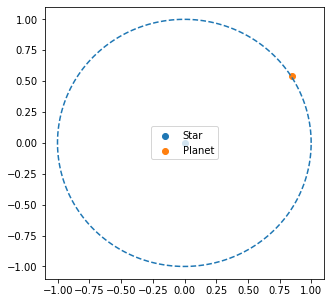

In [4]:
R = np.vstack((Sim_Data.x,Sim_Data.y,Sim_Data.z)).T
V = np.vstack((Sim_Data.vx,Sim_Data.vy,Sim_Data.vz)).T*v_to_m

print('Postion vecotors of both planet and star:',R)
print('Position and velocity of planet and star:',V)

data = [Sim_Data.mass[0],Sim_Data.mass[1],(R[0]-R[1]),(V[0]-V[1])] # since we need star on origin.
print(data)
Datmeas = cp.measure(data)
a = Datmeas.calculate_a()
print('Semi_Major Axis: ',a)
e = Datmeas.calculate_e(a)
print('Eccentricity: ',e)
Datmeas.graph('2D',a,e)


N =  2
time 1000.0
units:  1.9884699e+33 14960000000000.0 31556952.0
mass array [5.9724e-06 1.0000e+00]
PLANET_TEST_N2_RAU_EPS40009  Data Read successfully!
Postion vecotors of both planet and star: [[ 7.79003511e-01 -5.93716220e-01  0.00000000e+00]
 [ 1.31987943e-06  3.77576530e-02  0.00000000e+00]]
Position and velocity of planet and star: [[ 1.85588587e+04  2.32695404e+04  0.00000000e+00]
 [-1.10840928e-01  3.92819603e-02  0.00000000e+00]]
[5.9724e-06, 1.0, array([ 0.77900219, -0.63147387,  0.        ]), array([18558.96953064, 23269.50115975,     0.        ])]
Semi_Major Axis:  1.0000507941480417
Eccentricity:  0.002746985172355545


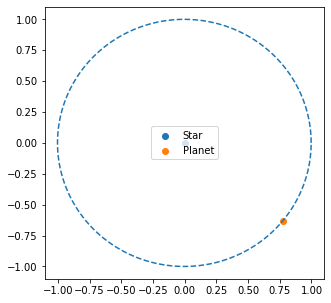

In [5]:
Sim_Data = cp.data('PLANET_TEST_N2_RAU_EPS40009')
Sim_Data.read()
R = np.vstack((Sim_Data.x,Sim_Data.y,Sim_Data.z)).T
V = np.vstack((Sim_Data.vx,Sim_Data.vy,Sim_Data.vz)).T*v_to_m
print('Postion vecotors of both planet and star:',R)
print('Position and velocity of planet and star:',V)
data = [Sim_Data.mass[0],Sim_Data.mass[1],(R[0]-R[1]),(V[0]-V[1])] # since we need star on origin.
print(data)
Datmeas = cp.measure(data)
a = Datmeas.calculate_a()
print('Semi_Major Axis: ',a)
e = Datmeas.calculate_e(a)
print('Eccentricity: ',e)
Datmeas.graph('2D',a,e)

## The File below was compiled using the Gertrude server and was over the period of 300,000 years

N =  2
time 300000.0
units:  1.9884699e+33 14960000000000.0 31556952.0
mass array [9.55e-04 1.00e+00]
TEST_PlanetSys_N2_R1AU_EPS40029  Data Read successfully!
Postion vecotors of both planet and star: [[7.91683495e-01 1.81082536e+03 0.00000000e+00]
 [1.98941711e-04 1.81021947e+03 0.00000000e+00]]
Position and velocity of planet and star: [[-1.83903556e+04  2.35330371e+04  0.00000000e+00]
 [ 1.75627896e+01  6.04315532e+00  0.00000000e+00]]
[0.000955, 1.0, array([0.79148455, 0.60589103, 0.        ]), array([-18407.91842533,  23526.99395679,      0.        ])]
Semi_Major Axis:  0.9943317452915187
Eccentricity:  0.002452809992476239


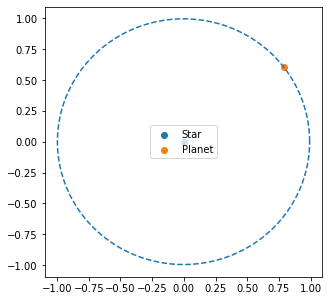

In [7]:
Sim_Data = cp.data('TEST_PlanetSys_N2_R1AU_EPS40029')
Sim_Data.read()
R = np.vstack((Sim_Data.x,Sim_Data.y,Sim_Data.z)).T
V = np.vstack((Sim_Data.vx,Sim_Data.vy,Sim_Data.vz)).T*v_to_m
print('Postion vecotors of both planet and star:',R)
print('Position and velocity of planet and star:',V)
data = [Sim_Data.mass[0],Sim_Data.mass[1],(R[0]-R[1]),(V[0]-V[1])] # since we need star on origin.
print(data)
Datmeas = cp.measure(data)
a = Datmeas.calculate_a()
print('Semi_Major Axis: ',a)
e = Datmeas.calculate_e(a)
print('Eccentricity: ',e)
Datmeas.graph('2D',a,e)